<a href="https://colab.research.google.com/github/VijayaBhargavi198/5731Assignments/blob/master/In_class_exercise_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 


In [39]:
#cleaning texts
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import pandas as pd
from textblob import Word
import numpy as np 
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
clean_text_review=[]
clean_text=[]
df=pd.read_csv("/content/sample_data/Amazon_Unlocked_Mobile.csv")
df=df.dropna() 
input_df=df.sample(n = 25000)
# cleaning the text data
input_df['cleaned text review'] = input_df['Reviews'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['cleaned text review'] = input_df['cleaned text review'].str.replace(r'\d+',"") #2.To remove Numbers
input_df['cleaned text review'] = input_df['cleaned text review'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df['cleaned text review'] = input_df['cleaned text review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #remove all stop words
input_df['cleaned text review'] = input_df['cleaned text review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) #lemmatization
#input_df['cleaned text review'] # dataframe column that would be used for further process
input_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,cleaned text review
45550,Apple iPhone 5s 32GB (Silver) - Verizon Wireless,Apple,209.00,1,Bought this from Best Price Phones or kugs8989...,3.0,bought best price phone kugs february listed n...
321011,Samsung Galaxy J7 SM-J700H/DS GSM Factory Unlo...,Samsung,209.00,3,The camera fails sometimes when launching it o...,0.0,camera fails sometimes launching trying use ap...
136337,BLU Studio 5.0 C HD Smartphone - Unlocked - Ye...,BLU,2000.00,5,Excelente,0.0,excelente
314422,Samsung Galaxy Grand Prime G531H/DS Internatio...,Samsung,189.90,5,The product was exactly as described and shipp...,0.0,product exactly described shipped promptly happy
101248,Blackberry Torch 9810 Unlocked GSM Phone with ...,BlackBerry,79.99,5,exelente producto se los recomindo llego justo...,0.0,exelente producto se los recomindo llego justo...
...,...,...,...,...,...,...,...
230687,LG Nexus 5X Unlocked Smartphone - Mint 16GB (U...,LG,449.00,5,Replacement for a Nexus 4. Very happy. This is...,0.0,replacement nexus happy great phone excellent ...
298990,POSH MOBILE TITAN PRO HD ANDROID GSM UNLOCKED ...,Posh Mobile,95.00,1,"Unless you have very small hands, don't even t...",0.0,unless small hand even think getting
145111,BLU Studio C 5.0-Inch Android Smartphone with ...,BLU,99.99,5,I love this phone. For the last eight years I ...,26.0,love phone last eight year locked buying new s...
329210,Samsung Galaxy Note 5 N920C 32GB Factory Unloc...,Samsung,599.00,5,This phone is awesome. It has so many features...,2.0,phone awesome many feature disappoint


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(input_df['cleaned text review'].values)

# K-Means

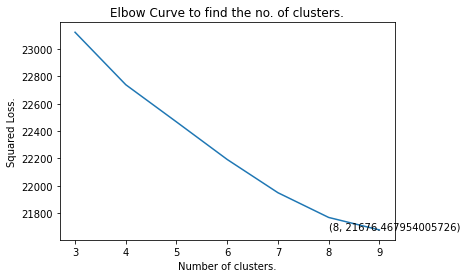

The optimal number of clusters obtained is -  8
The loss for optimal cluster is -  21676.467954005726


In [41]:
from sklearn.cluster import KMeans
number_of_clusters = [x for x in range(3, 10)]
squared_errors = []
for cluster in number_of_clusters:
    kmeans = KMeans(n_clusters = cluster).fit(tfidf_vectors)
    squared_errors.append(kmeans.inertia_)
optimal_clusters = np.argmin(squared_errors) + 2 
plt.plot(number_of_clusters, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))  

The Silhouette Score is:  0.05429443238020145
Kmeans_Cluster Labels
0      383
1      394
2     1019
3      984
4      774
5    11015
6     9761
7      670
Name: Reviews, dtype: int64
Top terms per cluster:
Cluster 0: excelente
 producto
 gracias
 telefono
 teléfono
 servicio
 muy
 bueno
Cluster 1: perfect
 condition
 everything
 work
 phone
 thanks
 thank
 love
Cluster 2: good
 phone
 product
 price
 quality
 thanks
 work
 far
Cluster 3: great
 phone
 work
 price
 product
 buy
 good
 far
Cluster 4: excellent
 product
 phone
 recommended
 condition
 good
 recommend
 seller
Cluster 5: work
 product
 good
 ok
 nice
 great
 excelent
 phone
Cluster 6: phone
 great
 like
 good
 work
 one
 battery
 new
Cluster 7: love
 phone
 great
 daughter
 son
 work
 new
 good


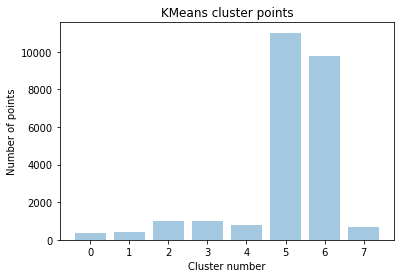

In [42]:
#now from above we can obtain the best or optimal K value
#Apply the k means clustering with optimal k 
optimal_k = 8
model = KMeans(n_clusters = optimal_k)
model.fit(tfidf_vectors)

model_labels = model.labels_
cluster_centers = model.cluster_centers_
terms = vectorizer.get_feature_names()

from sklearn import metrics
silhouette_score = metrics.silhouette_score(tfidf_vectors, model_labels, metric='euclidean')
print('The Silhouette Score is: ', silhouette_score)

# Assigning each review to a cluster
input_df['Kmeans_Cluster Labels'] = model_labels

# Finding the number of reviews in each cluster
print(input_df.groupby(['Kmeans_Cluster Labels'])['Reviews'].count())

# Finding the top 10 features of each cluster centriod
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(optimal_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :optimal_k]:
        print(' %s' % terms[ind], end='')
        print()
        
# Visualizing how reviews are distributed across the clusters 
plt.bar([x for x in range(optimal_k)], input_df.groupby(['Kmeans_Cluster Labels'])['Reviews'].count(),alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()


# DBSCAN

In [43]:
import gensim
import numpy as np
from sklearn.cluster import DBSCAN
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

In [44]:
# Just like Kmeans where we found optimal-k, find optimal epsilon
#creating text corpus
review_list= []
for review in input_df['cleaned text review'].values:
    review_list.append(review.split())

# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(review_list,size=100, workers=4)

review_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for review in review_list: # for each review/sentence
    review_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in review: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            review_vec += vec
            cnt_words += 1
        except:
            pass
    review_vec /= cnt_words
    review_vectors.append(review_vec)
review_vectors = np.array(review_vectors)
review_vectors = np.nan_to_num(review_vectors)
review_vectors.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


(25000, 100)

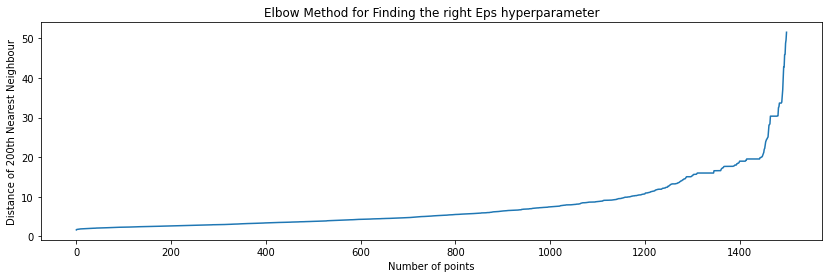

In [45]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in review_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, review_vectors[:1500]) )
twohundrethneigh.sort()
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [46]:
# Applying the DBSCAN clustering using optimal epsilon.
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 15, min_samples = minPts).fit(review_vectors)

# Assigning each review to a cluster
input_df['DBSCAN_Cluster Labels'] = dbscan.labels_

# Finding the number of reviews in each cluster
print(input_df.groupby(['DBSCAN_Cluster Labels'])['Reviews'].count())

DBSCAN_Cluster Labels
0    25000
Name: Reviews, dtype: int64


# Hierarchical clustering

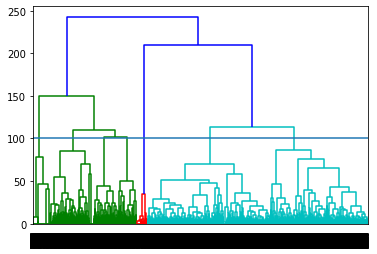

In [47]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(review_vectors,method='ward'))
plt.axhline(y=100)# cut at 100

In [48]:
 #applying aggomerative method with 7 clusters
 #took n_cluster=6 from dendrogram curve 
from sklearn.cluster import AgglomerativeClustering 
h_clustering = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward') 
Agg=h_clustering.fit_predict(review_vectors)
labels= h_clustering.labels_
# Adding a column for hierarichial labels in dataset, assigning labels to each review like before
input_df['Hierarchical_Cluster Labels'] = labels
# Finding the number of reviews in each cluster
input_df.groupby(['Hierarchical_Cluster Labels'])['Reviews'].count()

Hierarchical_Cluster Labels
0    7297
1    1269
2    3284
3    1366
4    9143
5     842
6    1799
Name: Reviews, dtype: int64

# Analysis

K-means is a centroid-based clustering algorithm.  This algorithm partitions all the points in the sample into K groups of similarity. The similarity is usually measured using Euclidian Distance.
DBScan is a density-based clustering algorithm. The key factor is the neighbourhood of each point in a cluster which is within a given radius.
Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters.It gives us information also about clusters within clusters.
For my information once optimal K is found and model is fitted with optimal K, then i think in my case K-mens proves to be the most efficient and flexible. 